In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [3]:
import pandas as pd

In [4]:
import pandas_datareader as web

C:\Users\esaeri-1122\AppData\Local\Continuum\anaconda3\envs\pyfinance\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [25]:
spy_etf = web.DataReader('SPY','yahoo',start,end)

In [26]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1903 entries, 2010-01-04 to 2017-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1903 non-null   float64
 1   Low        1903 non-null   float64
 2   Open       1903 non-null   float64
 3   Close      1903 non-null   float64
 4   Volume     1903 non-null   float64
 5   Adj Close  1903 non-null   float64
dtypes: float64(6)
memory usage: 104.1 KB


In [27]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.246048
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,92.490204
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,92.555328
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,92.946060
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.255348


In [28]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-25')

In [29]:
aapl = web.DataReader('AAPL','yahoo', start,end)

In [30]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

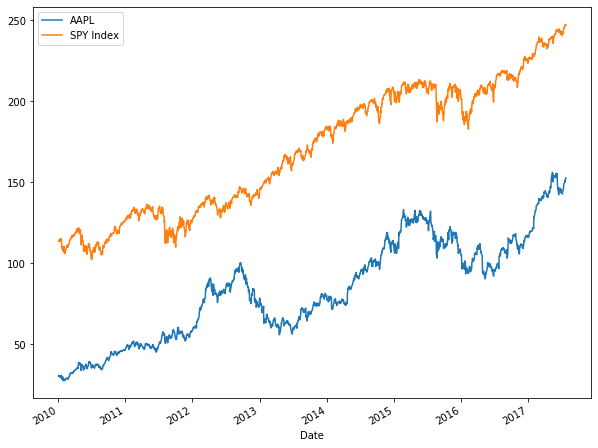

In [32]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [33]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

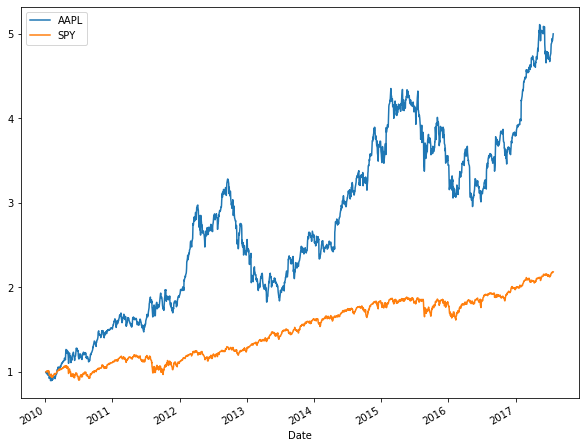

In [34]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [35]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

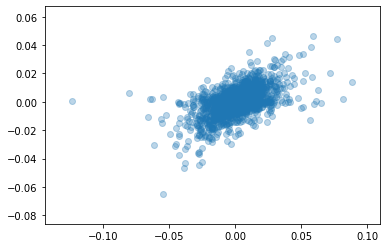

In [36]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

In [38]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [39]:
beta

0.32564474408628813

In [40]:
alpha

0.0001374400657702816

In [41]:
r_value

0.5555914696345486

In [42]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [43]:
import numpy as np

In [45]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [46]:
noise

array([-0.00117289,  0.00123742, -0.0007068 , ..., -0.00110729,
       -0.00057547,  0.00282913])

In [47]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

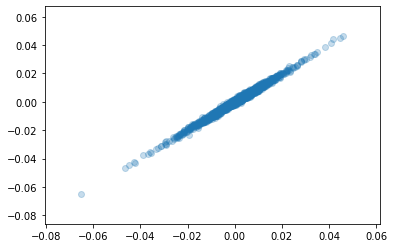

In [48]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25)

In [50]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,
                                                      spy_etf['Daily Return'].iloc[1:])

In [51]:
beta

0.9901069288703327